# Random Matrix Music Maker

### Daniel Jordán

## About me
* I'm from Peru
* Studied classical guitar & physics
* Musical influences: `numpy.random` module

In [1]:
ls *.wav

wave1.wav          wave2.wav  wave4.wav  wave6.wav
wave2_tonotes.wav  wave3.wav  wave5.wav


In [2]:
rm *.wav

In [3]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Math, Audio

np.random.seed(513564)
cmap = plt.cm.inferno

In [4]:
def matrix_to_latex(mat, maxrows= None, maxcols=None, maxdecimals='3'):
    flt = (mat.dtype == float)
    rowend, colend = False, False
    if maxrows:
        irange = maxrows
        rowend = True
    if maxcols:
        jrange = maxcols
        colend = True
    if not maxrows and not maxcols:
        irange, jrange = mat.shape
    matstr = r"\begin{bmatrix}"
    for i in range(irange):
        for j in range(jrange):
            if flt:
                matstr += '{0:.{1}f}'.format(mat[i,j], maxdecimals)
            else:
                matstr += '{}'.format(mat[i,j])
            
            if j<jrange-1:
                matstr += '&'
        if colend:
            if i==0:
                matstr += '&\cdots'
            else:
                matstr += '&'
        if i<irange-1:
            matstr += r'\\'
    if rowend:
        matstr += r'\\\vdots' + '&'*jrange + r'\ddots'
    matstr += '\end{bmatrix}'
    return matstr
#

def printmatrix(mat, maxrows=None, maxcols=None, maxdecimals='3', colorbar=True, title=None):
    display(Math(matrix_to_latex(mat, maxrows, maxcols, maxdecimals)))
    _ = plt.imshow(mat, cmap=plt.cm.inferno)
    if colorbar:
        _ = plt.colorbar()
    if title:
        _ = plt.title(title)
    _ = plt.axis('off')

# Origin story (of this project)

* Needed lists of random numbers for master's thesis
* Started playing around with 2D arrays of random numbers

<IPython.core.display.Math object>

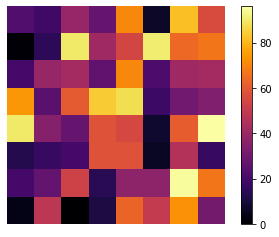

In [5]:
A = np.random.randint(100, size=(8,8))
printmatrix(A)

* Raising the matrix to the *n-th* power:  

$$A^n = \underbrace{A \times A \times \dots \times A}_{n-times}$$

In [6]:
pwrs = [2,3,4,5,6,7,8]
Apwr = {}
for pwr in pwrs:
    Apwr[pwr] = np.linalg.matrix_power(A, pwr)

<IPython.core.display.Math object>

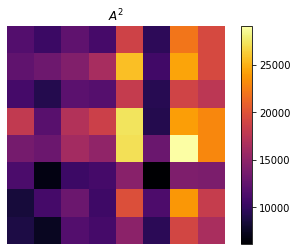

In [7]:
n = 2
printmatrix(Apwr[n], title='$A^{'+str(n)+'}$')

<IPython.core.display.Math object>

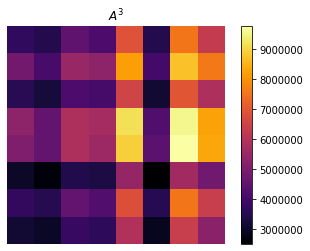

In [8]:
n = 3
printmatrix(Apwr[n], 4, 4, title='$A^{'+str(n)+'}$')

<IPython.core.display.Math object>

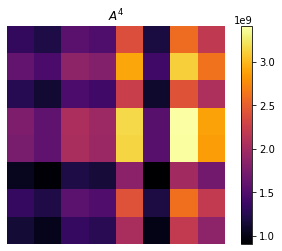

In [9]:
n = 4
printmatrix(Apwr[n], 4, 4, title='$A^{'+str(n)+'}$')

<IPython.core.display.Math object>

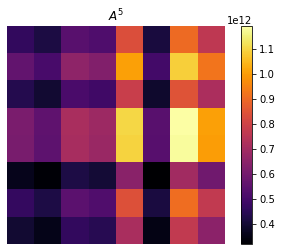

In [10]:
n = 5
printmatrix(Apwr[n], 3, 3, title='$A^{'+str(n)+'}$')

<IPython.core.display.Math object>

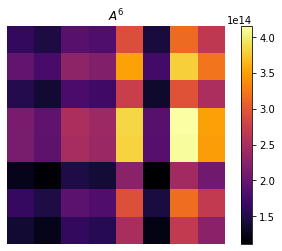

In [11]:
n = 6
printmatrix(Apwr[n], 3, 3, title='$A^{'+str(n)+'}$')

<IPython.core.display.Math object>

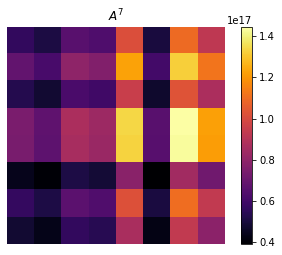

In [12]:
n = 7
printmatrix(Apwr[n], 2, 2, title='$A^{'+str(n)+'}$')

$\star$ We've reached a *steady state*!... but *why?*

* Except...

<IPython.core.display.Math object>

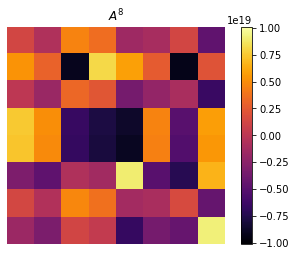

In [13]:
n = 8
printmatrix(Apwr[n], 2, 2, title='$A^{'+str(n)+'}$')

OVERFLOW!

* Relative magnitudes are important

<IPython.core.display.Math object>

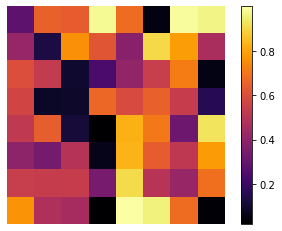

In [14]:
A = np.random.random(size=(8,8))
printmatrix(A)

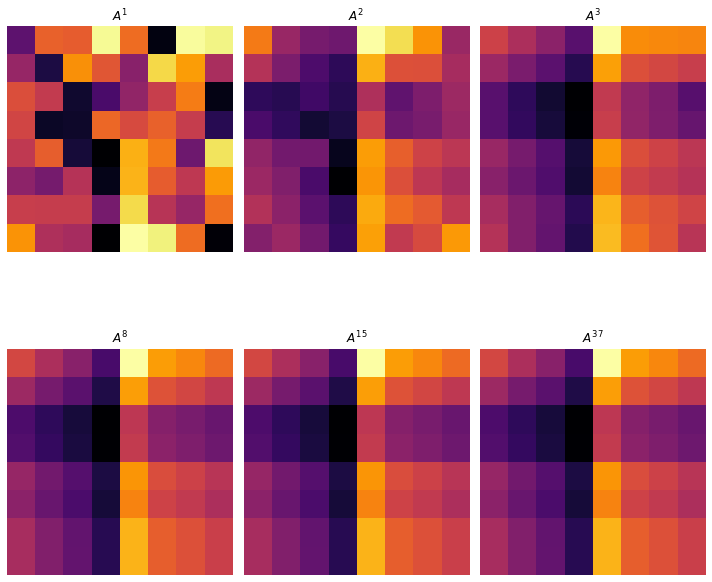

In [15]:
pwrs = np.array([[1,2,3],[8,15,37]])

fig, axs = plt.subplots(pwrs.shape[0],pwrs.shape[1], figsize=(10,10))

for i in range(pwrs.shape[0]):
    for j in range(pwrs.shape[1]):
        Apwr = np.linalg.matrix_power(A, pwrs[i,j])
        Apwr /= Apwr.max()
        axs[i,j].imshow(Apwr, cmap=cmap)
        axs[i,j].set_title('$A^{'+str(pwrs[i,j])+'}$')
        axs[i,j].axis('off')
fig.tight_layout()

* Same matrix to various powers

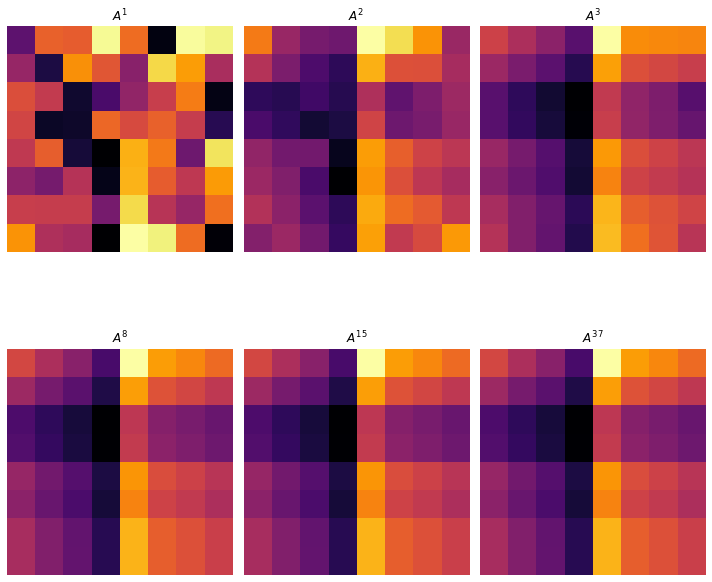

In [16]:
fig

## And now, music?

* Pattern similar to a *step sequencer*
* Each square button is a tone

![Arturia Step sequencer](presentation_files/arturia480.jpg)

* Similar to a $4\times4$ matrix

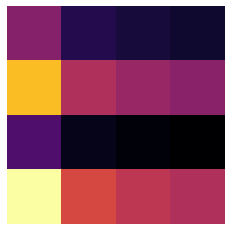

In [17]:
A = np.random.random(size=(4,4))
fig, ax = plt.subplots()
ax.imshow(np.linalg.matrix_power(A, 10), cmap=cmap)
_ = ax.axis('off')

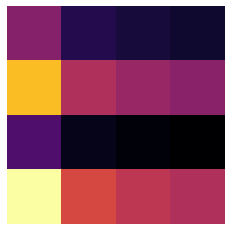

In [18]:
fig #4x4 matrix to the 10th power

* I followed tutorials by @akey7
* Used `sounddevice` module
* Created `Random Matrix Music Maker`($RM^3$):
* (Apologies to those with Perfect Pitch)

In [19]:
from rm3 import rm3
wave = rm3()
wave.play()

wave.save('wave1.wav')

display(Audio('wave1.wav'))

* A tool for musical inspiration

[[495.72791943 490.13231934 669.82575645 720.81809612]
 [240.86673807 238.30694065 320.51080722 343.8381191 ]
 [479.52804865 474.12543    647.62208416 696.85592908]
 [257.05556803 254.30293815 342.69934768 367.78395787]]


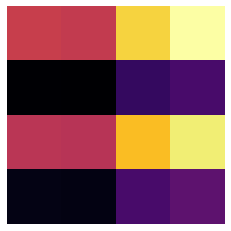

In [20]:
wave.make_matrix()

* You can make and play new matrices
* Lighter squares generate higher-frequency tones while darker squares generate lower-frequency tones

[[336.98947066 499.19652575 364.18879868 627.67811917]
 [207.26638496 304.99616771 223.65399447 382.40635415]
 [448.15619754 665.61730208 484.62070626 837.86471632]
 [305.79150204 452.49200563 330.3906847  568.69106988]]


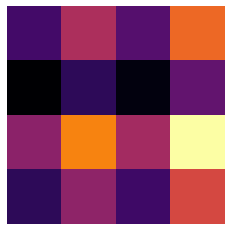

In [21]:
wave.make_play(show=True)

wave.save('wave2.wav')

display(Audio('wave2.wav'))

* We can shift frequencies to closest notes:

In [22]:
wave.to_notes()

wave.save('wave2_tonotes.wav')

display(Audio('wave2_tonotes.wav'))

E4 B4 F#4 D#5 G#3 D#4 A3 G4 A4 E5 B4 G#5 D#4 A4 E4 C#5 


* Can also change various parameters
* For example, a *bass-y* riff

In [23]:
wave.tempo = 70
wave.central_freq = 100
wave.freq_spread = 'tight'
wave.clip_level = 0.2
wave.make_play()

wave.save('wave3.wav')

display(Audio('wave3.wav'))

* Or a chaotic lead

In [24]:
wave.tempo = 120
wave.central_freq = 500
wave.freq_spread = 'wide'
wave.clip_level = 0.2
wave.make_play()

wave.save('wave4.wav')

display(Audio('wave4.wav'))

* If you like it, repeat it or loop it!

[[ 323.1584531    82.32983425  343.00932889   75.27214713]
 [1298.21054405  600.1614212  1355.61608158  579.73511314]
 [ 463.90896838  157.11678593  489.22330547  148.10196233]
 [ 731.49193958  299.1334698   767.01670833  286.51393685]]


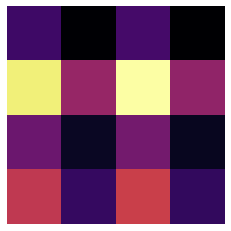

In [25]:
wave.make_play(2, show=True)

wave.save('wave5.wav', 2) # Saved melody 2 times

display(Audio('wave5.wav'))

* Or use it to make some interesting effects

[[ 434.15268128  533.51606341  269.54667342   20.           56.52651125
   287.0602703   457.30752294]
 [ 755.43643341  878.61750222  551.37223524   73.08787619  287.29038616
   573.08489011  784.14000126]
 [ 494.32529691  598.14939139  322.32883276   20.           99.74562553
   340.62901029  518.51870935]
 [1278.34293036 1440.2890213  1010.0607815   381.25958496  662.87223961
  1038.6053822  1316.08068252]
 [1373.8227737  1542.84716028 1093.8145575   437.53021168  731.45130965
  1123.60701549 1413.2097776 ]
 [ 539.04497475  646.18427528  361.5561228    20.          131.86555066
   380.44066811  564.0102473 ]
 [ 487.81686387  591.15846652  316.6194714    20.           95.07058172
   334.83500768  511.89734319]]


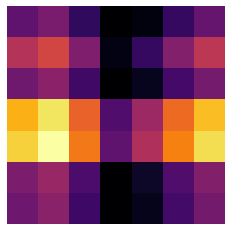

In [26]:
wave.dimension = 7
wave.tempo = 800
wave.central_freq = 567
wave.freq_spread = 'wide'
wave.clip_level = 0.35
wave.make_play(2, show=True)

wave.save('wave6.wav',2)

display(Audio('wave6.wav'))

# Thank you!

* Find project at `github.com/danj7/RandomMatrixMusicMaker/`